# Разведочный анализ данных (Студенческая депрессия)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('student_depression_dataset.csv')
print(df.shape)
df.head()

(27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [7]:
# Описание категориальных признаков
df.describe(include=['object'])

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


In [8]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

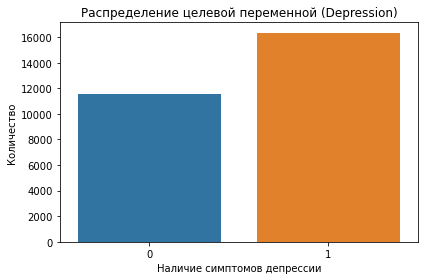

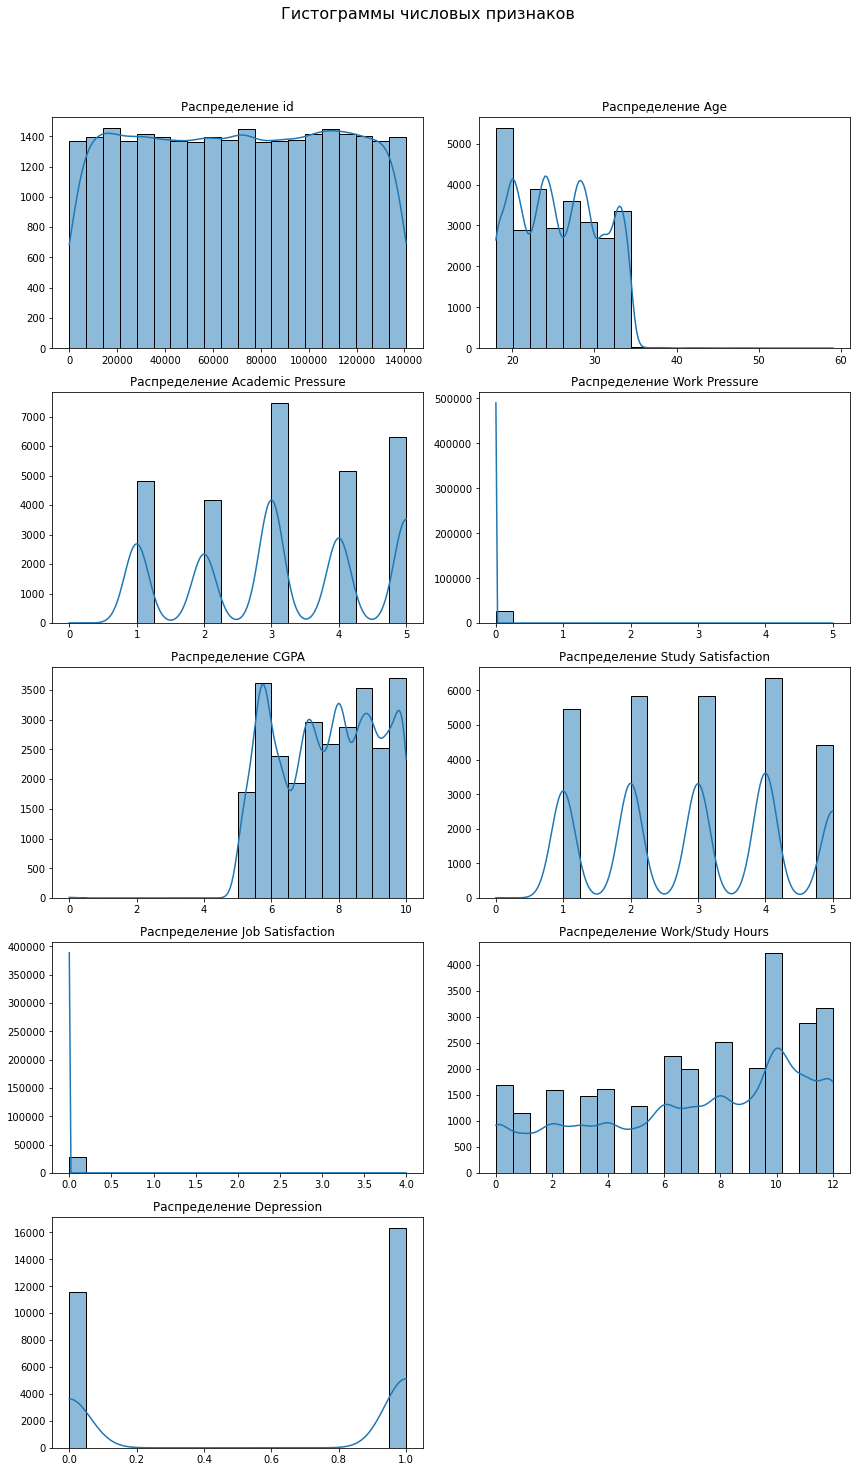

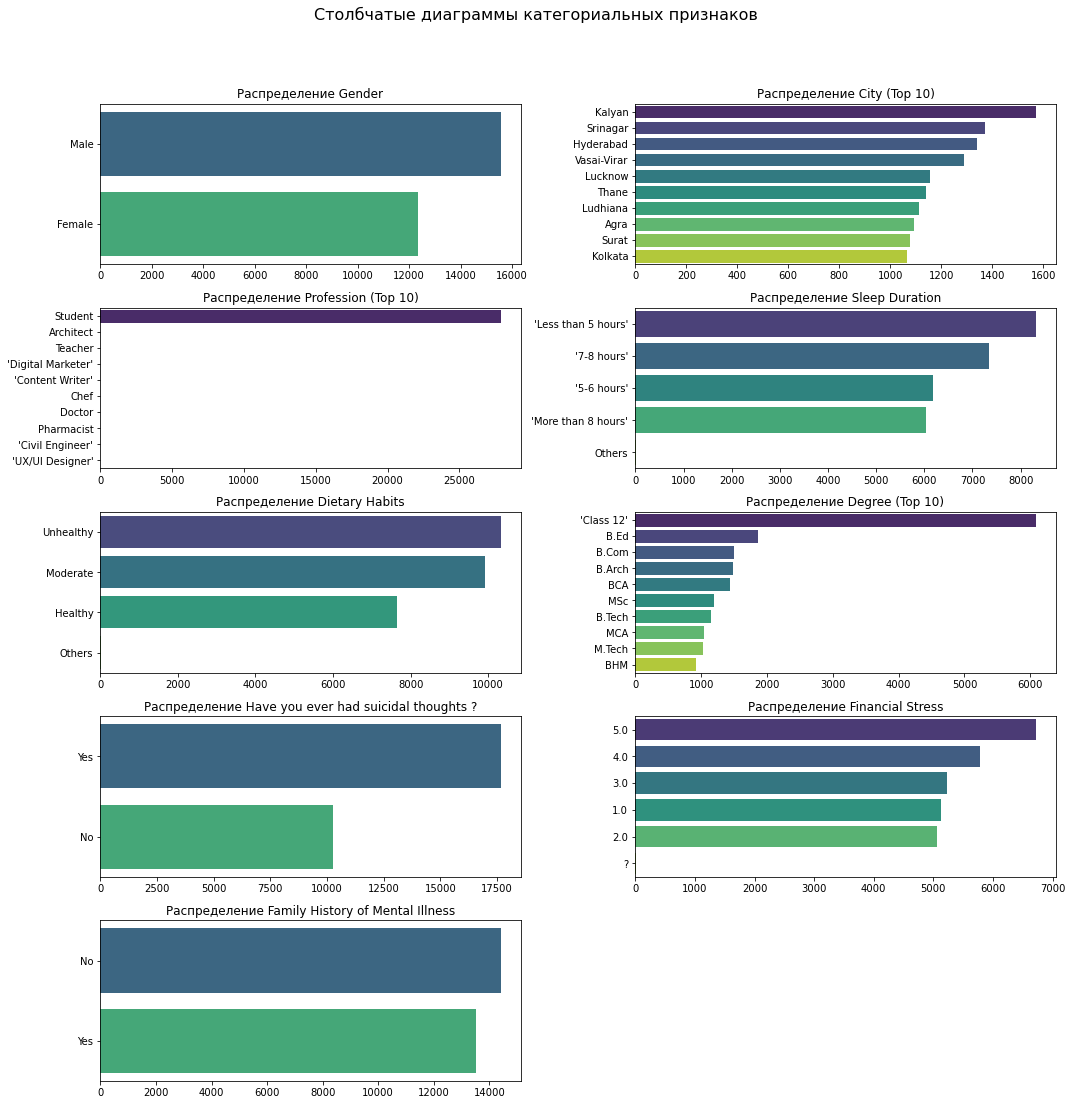

In [7]:
# 1. Распределение целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Depression')
plt.title('Распределение целевой переменной (Depression)')
plt.xlabel('Наличие симптомов депрессии')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# 2. Гистограммы для числовых признаков
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Student_ID' in numerical_cols: # Исключаем ID 
    numerical_cols.remove('Student_ID')

n_cols_numeric = 2 # Адаптируем количество колонок для графиков
n_rows_numeric = (len(numerical_cols) - 1) // n_cols_numeric + 1
fig, axes = plt.subplots(n_rows_numeric, n_cols_numeric, figsize=(12, n_rows_numeric * 4))
if n_rows_numeric * n_cols_numeric == 1: # Если только один график
    axes = np.array([axes])
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Скрываем лишние subplots, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Гистограммы числовых признаков', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


# 3. Столбчатые диаграммы для категориальных признаков
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Depression_Symptoms' in categorical_cols:
    categorical_cols.remove('Depression') 

n_cols_categorical = 2 # Уменьшим количество колонок для лучшей читаемости
n_rows_categorical = (len(categorical_cols) - 1) // n_cols_categorical + 1
fig, axes = plt.subplots(n_rows_categorical, n_cols_categorical, figsize=(15, n_rows_categorical * 3)) # Адаптируем размер
if n_rows_categorical * n_cols_categorical == 1: # Если только один график
    axes = np.array([axes])
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top_n = 10 # Для признаков с большим количеством уникальных значений
    if df[col].nunique() > top_n:
        order = df[col].value_counts().nlargest(top_n).index
        sns.countplot(data=df, y=col, order=order, ax=axes[i], palette="viridis")
        axes[i].set_title(f'Распределение {col} (Top {top_n})')
    else:
        order = df[col].value_counts().index
        sns.countplot(data=df, y=col, order=order, ax=axes[i], palette="viridis")
        axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Столбчатые диаграммы категориальных признаков', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Преобразование признаков

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Student_ID' in numerical_cols:
  numerical_cols.remove('Student_ID') # Убираем Student_ID из модели
print("Категориальные колонки:", categorical_cols)
print("Числовые колонки:", numerical_cols)

Категориальные колонки: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
Числовые колонки: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']


In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 2. Удаление 'Student_ID'
if 'Student_ID' in df.columns:
    df = df.drop('Student_ID', axis=1)
    print("Столбец 'Student_ID' удален.")

# 3. Кодирование целевой переменной 'Depression'
le = LabelEncoder()
df['Depression'] = le.fit_transform(df['Depression'])
print(f"\nЦелевая переменная 'Depression' закодирована. Классы: {le.classes_} -> {le.transform(le.classes_)}")


Целевая переменная 'Depression' закодирована. Классы: [0 1] -> [0 1]


In [11]:
categorical_cols_for_woe = df.select_dtypes(include='object').columns.tolist()
numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
if 'Depression' in numerical_cols_for_scaling: # не должна масштабироваться
    numerical_cols_for_scaling.remove('Depression')

In [12]:
# 4. Расчет WoE и трансформация категориальных признаков
woe_dfs = []
woe_mappings = {}

def calculate_woe(df_calc, feature_name, target_name):
    smoothing = 0.5
    df_temp = pd.DataFrame({'feature': df_calc[feature_name], 'target': df_calc[target_name]})

    total_events = df_temp['target'].sum()
    total_non_events = len(df_temp) - total_events

    grouped = df_temp.groupby('feature')['target'].agg(['sum', 'count'])
    grouped.rename(columns={'sum': 'events', 'count': 'total_in_category'}, inplace=True)
    grouped['non_events'] = grouped['total_in_category'] - grouped['events']

    grouped['events'] = grouped['events'] + smoothing
    grouped['non_events'] = grouped['non_events'] + smoothing

    # Добавляем сглаживание
    dist_events = grouped['events'] / (total_events + smoothing * len(grouped))
    dist_non_events = grouped['non_events'] / (total_non_events + smoothing * len(grouped))

    dist_events = np.where(dist_events == 0, 0.00001, dist_events)
    dist_non_events = np.where(dist_non_events == 0, 0.00001, dist_non_events)

    grouped['woe'] = np.log(dist_non_events / dist_events) # Изменено для классической формулы WoE
    return grouped['woe'].to_dict()

df_processed_woe = df.copy()
for col in categorical_cols_for_woe:
    woe_map = calculate_woe(df_processed_woe, col, 'Depression')
    woe_mappings[col] = woe_map
    df_processed_woe[col + '_woe'] = df_processed_woe[col].map(woe_map)
    df_processed_woe = df_processed_woe.drop(col, axis=1)
    print(f"Столбец {col} заменен на {col}_woe.")

Столбец Gender заменен на Gender_woe.
Столбец City заменен на City_woe.
Столбец Profession заменен на Profession_woe.
Столбец Sleep Duration заменен на Sleep Duration_woe.
Столбец Dietary Habits заменен на Dietary Habits_woe.
Столбец Degree заменен на Degree_woe.
Столбец Have you ever had suicidal thoughts ? заменен на Have you ever had suicidal thoughts ?_woe.
Столбец Financial Stress заменен на Financial Stress_woe.
Столбец Family History of Mental Illness заменен на Family History of Mental Illness_woe.


In [13]:
# 5. Масштабирование числовых признаков
if numerical_cols_for_scaling:
    scaler = StandardScaler()
    df_processed_woe[numerical_cols_for_scaling] = scaler.fit_transform(df_processed_woe[numerical_cols_for_scaling])
    print("Числовые признаки отмасштабированы.")

df_processed_woe.head()

Числовые признаки отмасштабированы.


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_woe,City_woe,Profession_woe,Sleep Duration_woe,Dietary Habits_woe,Degree_woe,Have you ever had suicidal thoughts ?_woe,Financial Stress_woe,Family History of Mental Illness_woe
0,-1.733252,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,1,-0.003250,0.064564,0.001292,0.068341,0.530127,0.231473,-0.982457,1.104958,0.104184
1,-1.733105,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,0,0.004088,-0.097219,0.001292,0.068341,0.103284,-0.014236,1.541086,0.628098,-0.113188
2,-1.732662,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,0,-0.003250,0.119458,0.001292,-0.252283,0.530127,0.205040,1.541086,1.104958,-0.113188
3,-1.732563,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.851495,1,0.004088,0.219204,0.001292,-0.039369,0.103284,0.057149,-0.982457,-1.122736,-0.113188
4,-1.732514,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.660650,0,0.004088,0.248226,0.001292,0.068341,0.103284,0.305929,-0.982457,1.104958,0.104184


In [14]:
print(df_processed_woe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         27901 non-null  float64
 1   Age                                        27901 non-null  float64
 2   Academic Pressure                          27901 non-null  float64
 3   Work Pressure                              27901 non-null  float64
 4   CGPA                                       27901 non-null  float64
 5   Study Satisfaction                         27901 non-null  float64
 6   Job Satisfaction                           27901 non-null  float64
 7   Work/Study Hours                           27901 non-null  float64
 8   Depression                                 27901 non-null  int64  
 9   Gender_woe                                 27901 non-null  float64
 10  City_woe              

In [15]:
# 6. Расчет Somers' D
from sklearn.metrics import roc_auc_score
target_col_name = 'Depression'
features_for_somers_d_woe = [col for col in df_processed_woe.columns if col != target_col_name]
somers_d_results_woe = {}

for feature in features_for_somers_d_woe:
    if df_processed_woe[feature].isnull().any():
        print(f"Внимание: пропуски в признаке {feature}, Somers' D не будет рассчитан.")
        continue
    auc = roc_auc_score(df_processed_woe[target_col_name], df_processed_woe[feature])
    somers_d = 2 * (auc - 0.5)
    somers_d_results_woe[feature] = somers_d

somers_d_df_woe = pd.DataFrame(list(somers_d_results_woe.items()), columns=['Признак', "Somers' D"])
somers_d_df_woe.dropna(subset=["Somers' D"], inplace=True)
somers_d_df_woe['Abs Somers\' D'] = somers_d_df_woe["Somers' D"].abs()
somers_d_df_woe = somers_d_df_woe.sort_values(by='Abs Somers\' D', ascending=False).reset_index(drop=True)

print(f"Somers' D для признаков (с WoE) по отношению к '{target_col_name}':")
pd.set_option('display.max_rows', None)
print(somers_d_df_woe[['Признак', "Somers' D"]])
pd.reset_option('display.max_rows')


# 7. Отбор признаков по Somers' D > 0.1 
threshold_somers_d = 0.1
selected_features_somers_d = somers_d_df_woe[somers_d_df_woe['Abs Somers\' D'] > threshold_somers_d]['Признак'].tolist()

print(f"\nПризнаки, отобранные по |Somers' D| > {threshold_somers_d}")
print(f"Количество отобранных признаков: {len(selected_features_somers_d)}")
print("Список отобранных признаков:")
for f in selected_features_somers_d:
    somers_d_val = somers_d_df_woe.loc[somers_d_df_woe['Признак'] == f, "Somers' D"].iloc[0]
    print(f"- {f} (Somers' D: {somers_d_val:.4f})")


Somers' D для признаков (с WoE) по отношению к 'Depression':
                                      Признак  Somers' D
0                           Academic Pressure   0.540889
1   Have you ever had suicidal thoughts ?_woe  -0.534526
2                        Financial Stress_woe  -0.416294
3                                         Age  -0.263538
4                            Work/Study Hours   0.234120
5                          Dietary Habits_woe  -0.228428
6                          Study Satisfaction  -0.192943
7                                  Degree_woe  -0.144526
8                          Sleep Duration_woe  -0.111521
9                                    City_woe  -0.088782
10       Family History of Mental Illness_woe  -0.054201
11                                       CGPA   0.025530
12                                 Gender_woe  -0.001809
13                             Profession_woe  -0.001455
14                                         id   0.001091
15                         

In [16]:
# Создаем итоговый DataFrame с отобранными признаками
df_final_selected = df_processed_woe[selected_features_somers_d + [target_col_name]].copy()
print(df_final_selected.shape)
df_final_selected.head()

(27901, 10)


,Academic Pressure,Have you ever had suicidal thoughts ?_woe,Financial Stress_woe,Age,Work/Study Hours,Dietary Habits_woe,Study Satisfaction,Degree_woe,Sleep Duration_woe,Depression
0,1.345543,-0.982457,1.104958,1.463165,-1.121213,0.530127,-0.693425,0.231473,0.068341,1
1,-0.826104,1.541086,0.628098,-0.371474,-1.121213,0.103284,1.510636,-0.014236,0.068341,0
2,-0.102222,1.541086,1.104958,1.055467,0.497095,0.530127,1.510636,0.205040,-0.252283,0
3,-0.102222,-0.982457,-1.122736,0.443921,-0.851495,0.103284,-0.693425,0.057149,-0.039369,1
4,0.621660,-0.982457,1.104958,-0.167625,-1.660650,0.103284,0.041262,0.305929,0.068341,0


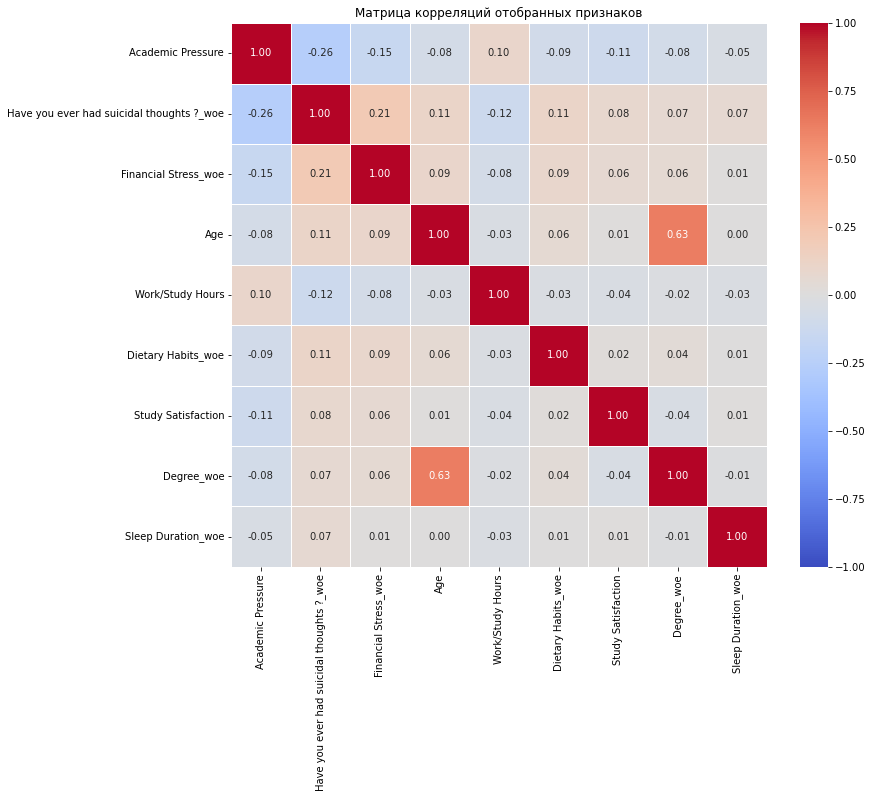

In [17]:
features_df_for_corr = df_final_selected.drop('Depression', axis=1)
# Рассчитываем матрицу корреляций
corr_matrix = features_df_for_corr.corr()

# Визуализируем
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Матрица корреляций отобранных признаков')
plt.show()

# Разделение на train-test и обучение baseline-моделей

На основе матрицы корреляций выше, решаем, нужно ли удалять какие-либо признаки. Для этого датасета такого не потребуется,

In [18]:
df_for_modeling = df_final_selected.copy()

from sklearn.model_selection import train_test_split

X = df_for_modeling.drop('Depression', axis=1)
y = df_for_modeling['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52, stratify=y)

print(f"\nРазмер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test): {X_test.shape}")
print(f"Распределение '{target_col_name}' в y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Распределение '{target_col_name}' в y_test: \n{y_test.value_counts(normalize=True)}")


Размер обучающей выборки (X_train): (19530, 9)
Размер тестовой выборки (X_test): (8371, 9)
Распределение 'Depression' в y_train: 
1    0.585509
0    0.414491
Name: Depression, dtype: float64
Распределение 'Depression' в y_test: 
1    0.585474
0    0.414526
Name: Depression, dtype: float64


In [19]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(random_state=52, max_iter=1000, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=52),
    "Random Forest": RandomForestClassifier(random_state=52, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=52, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

baseline_results = []
confusion_matrices_baseline = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0) # pos_label=1, если 1 - это 'Yes' (депрессия)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    baseline_results.append({
        "Модель": model_name,
        "ROC AUC": roc_auc,
        "F1": f1,
        "Recall": recall,
        "Accuracy": accuracy
    })
    confusion_matrices_baseline[model_name] = cm
    print(f"Матрица ошибок для {model_name}:\n{cm}\n")

baseline_results_df = pd.DataFrame(baseline_results)
baseline_results_df = baseline_results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
baseline_results_df

Матрица ошибок для Logistic Regression:
[[2711  759]
 [ 516 4385]]

Матрица ошибок для K-Nearest Neighbors:
[[2642  828]
 [ 677 4224]]

Матрица ошибок для Decision Tree:
[[2502  968]
 [1006 3895]]

Матрица ошибок для Random Forest:
[[2712  758]
 [ 615 4286]]

Матрица ошибок для XGBoost:
[[2682  788]
 [ 607 4294]]



,Модель,ROC AUC,F1,Recall,Accuracy
0,Logistic Regression,0.920275,0.873071,0.894715,0.847688
1,XGBoost,0.909336,0.860262,0.876148,0.833353
2,Random Forest,0.906928,0.861941,0.874515,0.835981
3,K-Nearest Neighbors,0.878548,0.848789,0.861865,0.820213
4,Decision Tree,0.758416,0.797829,0.794736,0.764186


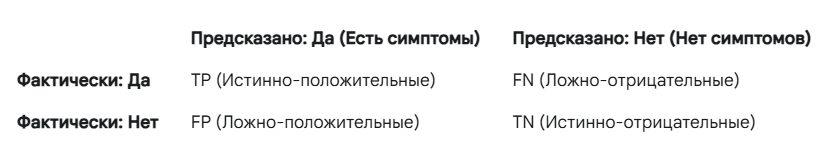

# Подбор гиперпараметров и оценка оптимальных моделей

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

counts = y_train.value_counts()
negative_class_count = counts.get(0, 0) # Количество (0)
positive_class_count = counts.get(1, 0) # Количество (1)
scale_pos_weight_val = negative_class_count / positive_class_count if positive_class_count != 0 else 1
class_weight_val = 'balanced'

param_grids = {
    "Logistic Regression": [
        { 
            'solver': ['saga'],
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': [None, class_weight_val],
            'max_iter': [1000, 2000]
        },
        { 
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': [None, class_weight_val],
            'max_iter': [1000]
        }
    ],
    "K-Nearest Neighbors": {
        'n_neighbors': [5, 9, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'manhattan']
    },
    "Decision Tree": { 
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': [None, class_weight_val]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, class_weight_val, 'balanced_subsample']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.7, 0.9],
        'colsample_bytree': [0.7, 0.9],
        'gamma': [0, 0.1],
        'scale_pos_weight': [1, scale_pos_weight_val]
    }
}

base_models_for_grid = {
    "Logistic Regression": LogisticRegression(random_state=52, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=52),
    "Random Forest": RandomForestClassifier(random_state=52, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=52, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

best_estimators = {}

for model_name in base_models_for_grid:
    print(f"\nПодбор гиперпараметров для: {model_name}")
    model = base_models_for_grid[model_name]
    grid = param_grids[model_name]
    stratified_kfold_splitter = StratifiedKFold(n_splits=3, shuffle=True, random_state=52)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=stratified_kfold_splitter, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Лучшие параметры для {model_name}: {grid_search.best_params_}")
    print(f"Лучший ROC AUC на CV для {model_name}: {grid_search.best_score_:.4f}")
    best_estimators[model_name] = grid_search.best_estimator_


Подбор гиперпараметров для: Logistic Regression
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Лучшие параметры для Logistic Regression: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Лучший ROC AUC на CV для Logistic Regression: 0.9209

Подбор гиперпараметров для: K-Nearest Neighbors
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Лучшие параметры для K-Nearest Neighbors: {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
Лучший ROC AUC на CV для K-Nearest Neighbors: 0.9053

Подбор гиперпараметров для: Decision Tree
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Лучшие параметры для Decision Tree: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучший ROC AUC на CV для Decision Tree: 0.8715

Подбор гиперпараметров для: Random Forest
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Лучшие параметры для R

In [21]:
tuned_model_results = []
confusion_matrices_tuned = {}

for model_name, tuned_model in best_estimators.items():
    y_pred_proba = tuned_model.predict_proba(X_test)[:, 1]
    y_pred = tuned_model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    tuned_model_results.append({
        "Модель": model_name + " (Tuned)",
        "ROC AUC": roc_auc,
        "F1": f1,
        "Recall": recall,
        "Accuracy": accuracy
    })
    confusion_matrices_tuned[model_name + " (Tuned)"] = cm
    print(f"Матрица ошибок для {model_name} (Tuned):\n{cm}\n")

tuned_results_df = pd.DataFrame(tuned_model_results)
tuned_results_df = tuned_results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
tuned_results_df

Матрица ошибок для Logistic Regression (Tuned):
[[2863  607]
 [ 714 4187]]

Матрица ошибок для K-Nearest Neighbors (Tuned):
[[2679  791]
 [ 543 4358]]

Матрица ошибок для Decision Tree (Tuned):
[[2753  717]
 [ 781 4120]]

Матрица ошибок для Random Forest (Tuned):
[[2829  641]
 [ 670 4231]]

Матрица ошибок для XGBoost (Tuned):
[[2876  594]
 [ 702 4199]]



,Модель,ROC AUC,F1,Recall,Accuracy
0,XGBoost (Tuned),0.921236,0.866309,0.856764,0.845180
1,Logistic Regression (Tuned),0.920283,0.863744,0.854315,0.842193
2,Random Forest (Tuned),0.917601,0.865855,0.863293,0.843388
3,K-Nearest Neighbors (Tuned),0.906097,0.867264,0.889206,0.840640
4,Decision Tree (Tuned),0.878517,0.846170,0.840645,0.821049


In [22]:
print("Результаты базовых моделей:")
baseline_results_df

Результаты базовых моделей:


,Модель,ROC AUC,F1,Recall,Accuracy
0,Logistic Regression,0.920275,0.873071,0.894715,0.847688
1,XGBoost,0.909336,0.860262,0.876148,0.833353
2,Random Forest,0.906928,0.861941,0.874515,0.835981
3,K-Nearest Neighbors,0.878548,0.848789,0.861865,0.820213
4,Decision Tree,0.758416,0.797829,0.794736,0.764186


# Итоговое сравнение результатов

In [23]:
# 1. Подготовка данных для сравнения
baseline_results_df['Base Model Name'] = baseline_results_df['Модель']
tuned_results_df['Base Model Name'] = tuned_results_df['Модель'].str.replace(' \\(Tuned\\)', '', regex=True)

comparison_df = pd.merge(
    baseline_results_df,
    tuned_results_df,
    on='Base Model Name',
    suffixes=('_baseline', '_tuned')
)

comparison_df = comparison_df[[
    'Base Model Name',
    'ROC AUC_baseline', 'ROC AUC_tuned',
    'F1_baseline', 'F1_tuned',
    'Recall_baseline', 'Recall_tuned',
    'Accuracy_baseline', 'Accuracy_tuned'
]]
comparison_df.rename(columns={'Base Model Name': 'Модель'}, inplace=True)

comparison_df['ROC AUC Improvement'] = comparison_df['ROC AUC_tuned'] - comparison_df['ROC AUC_baseline']
comparison_df['F1 Improvement'] = comparison_df['F1_tuned'] - comparison_df['F1_baseline']
comparison_df = comparison_df.sort_values(by="ROC AUC_tuned", ascending=False).reset_index(drop=True)
comparison_df

,Модель,ROC AUC_baseline,ROC AUC_tuned,F1_baseline,F1_tuned,Recall_baseline,Recall_tuned,Accuracy_baseline,Accuracy_tuned,ROC AUC Improvement,F1 Improvement
0,XGBoost,0.909336,0.921236,0.860262,0.866309,0.876148,0.856764,0.833353,0.845180,0.011900,0.006047
1,Logistic Regression,0.920275,0.920283,0.873071,0.863744,0.894715,0.854315,0.847688,0.842193,0.000008,-0.009327
2,Random Forest,0.906928,0.917601,0.861941,0.865855,0.874515,0.863293,0.835981,0.843388,0.010673,0.003914
3,K-Nearest Neighbors,0.878548,0.906097,0.848789,0.867264,0.861865,0.889206,0.820213,0.840640,0.027549,0.018474
4,Decision Tree,0.758416,0.878517,0.797829,0.846170,0.794736,0.840645,0.764186,0.821049,0.120101,0.048341


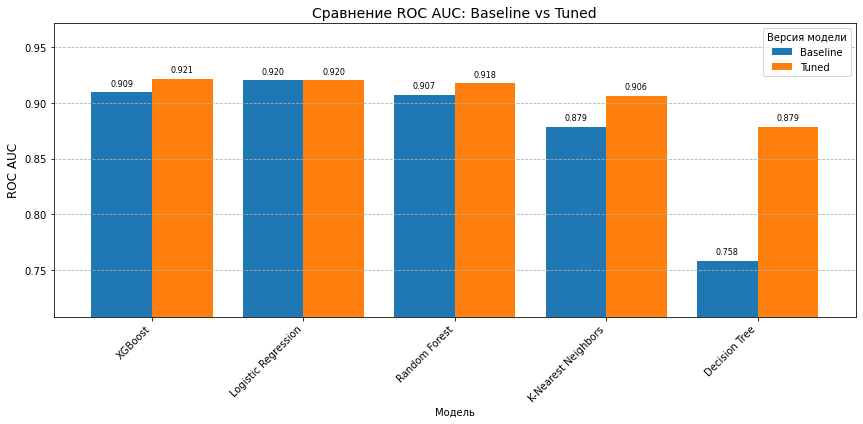

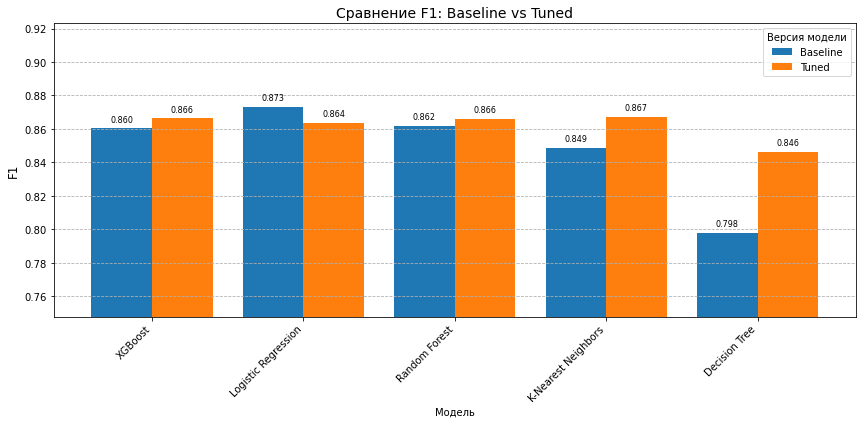

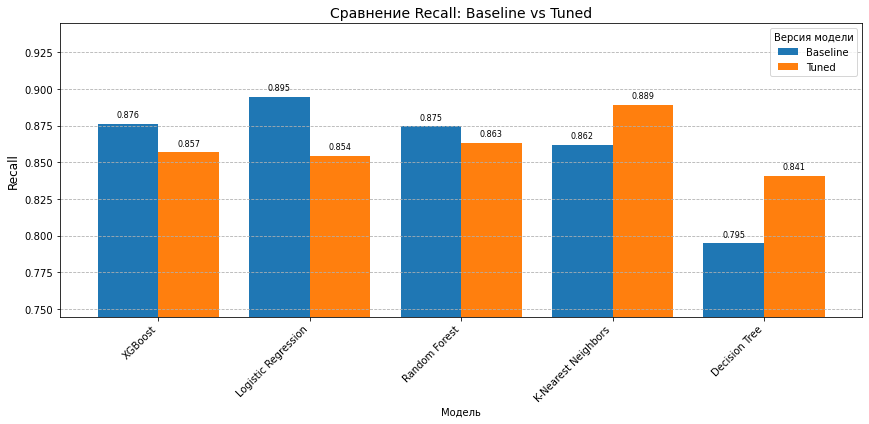

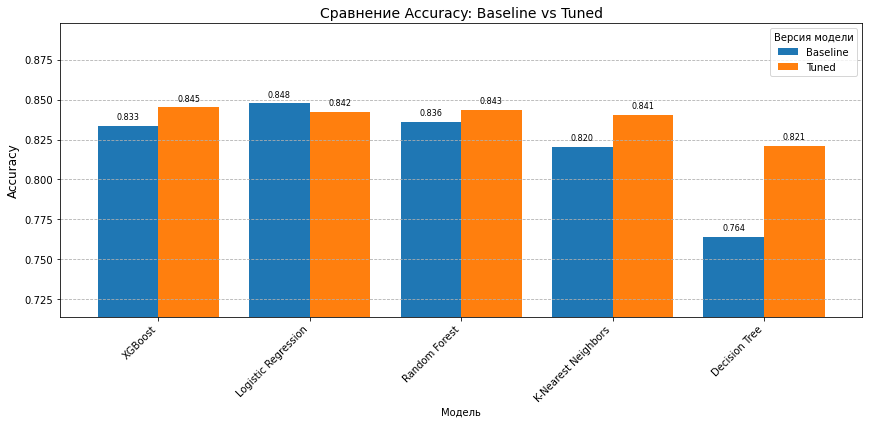

In [24]:
# 3. Визуализация сравнения
metrics_to_plot = ['ROC AUC', 'F1', 'Recall', 'Accuracy']
n_models = len(comparison_df['Модель'])

for metric_base_name in metrics_to_plot:
    metric_baseline_col = f'{metric_base_name}_baseline'
    metric_tuned_col = f'{metric_base_name}_tuned'

    plot_df = comparison_df[['Модель', metric_baseline_col, metric_tuned_col]].copy()
    plot_df.set_index('Модель', inplace=True)
    plot_df.rename(columns={metric_baseline_col: 'Baseline', metric_tuned_col: 'Tuned'}, inplace=True)

    ax = plot_df.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(f'Сравнение {metric_base_name}: Baseline vs Tuned', fontsize=14)
    plt.ylabel(metric_base_name, fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.legend(title='Версия модели', fontsize=10)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points', 
                    fontsize=8)

    min_val = plot_df.min().min()
    max_val = plot_df.max().max()
    plt.ylim(bottom=max(0, min_val - 0.05), top=min(1, max_val + 0.05)) 
    plt.grid(axis='y', linestyle='--')
    plt.show()

## Выводы по результатам моделирования:

1. **Лучшие модели**: После подбора гиперпараметров, лучшими моделями по ROC AUC стали XGBoost, LR и RF.
2. **Влияние подбора гиперпараметров**: 
   - Для большинства моделей наблюдается прирост в ROC AUC. Но не для LR - она не улучшила свои показатели.
   - Метрика F1-score сравнялась у всех моделей, кроме DT.
   - Лучший показатель по Recall неожиданно у KNN.
3. **Выбор признаков**: Отбор признаков на основе Somers' D и анализ корреляций помог построить более простые и интерпретируемые модели без значительной потери качества.
4. **Кодирование WoE**: Применение WoE-кодирования для категориальных признаков позволило использовать их в линейных моделях и моделях на основе деревьев, эффективно отражая их предсказательную силу.